In [1]:
!nvidia-smi

Sat May 25 03:53:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5597.6/8062.4 GB disk)


In [4]:
from IPython import display
display.clear_output()

from IPython.display import Image
from ultralytics import YOLO

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AgRivcdffivrgaoMEErV")
project = rf.workspace("driver-wlf6m").project("driving-monitoring-system")
version = project.version(2)
dataset = version.download("yolov8")

/kaggle/working/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 37.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing installati


Extracting Dataset Version Zip to driving-monitoring-system-2 in yolov8:: 100%|██████████| 49836/49836 [00:06<00:00, 8024.38it/s]


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

/kaggle/working
100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 204MB/s]
New https://pypi.org/project/ultralytics/8.2.21 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/datasets/driving-monitoring-system-2/data.yaml, epochs=50, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=F

In [7]:
!ls {HOME}/runs/detect/train/

F1_curve.png					  train_batch1.jpg
PR_curve.png					  train_batch2.jpg
P_curve.png					  train_batch57520.jpg
R_curve.png					  train_batch57521.jpg
args.yaml					  train_batch57522.jpg
confusion_matrix.png				  val_batch0_labels.jpg
confusion_matrix_normalized.png			  val_batch0_pred.jpg
events.out.tfevents.1716609287.9e519d82a3ff.70.0  val_batch1_labels.jpg
labels.jpg					  val_batch1_pred.jpg
labels_correlogram.jpg				  val_batch2_labels.jpg
results.csv					  val_batch2_pred.jpg
results.png					  weights
train_batch0.jpg


/kaggle/working


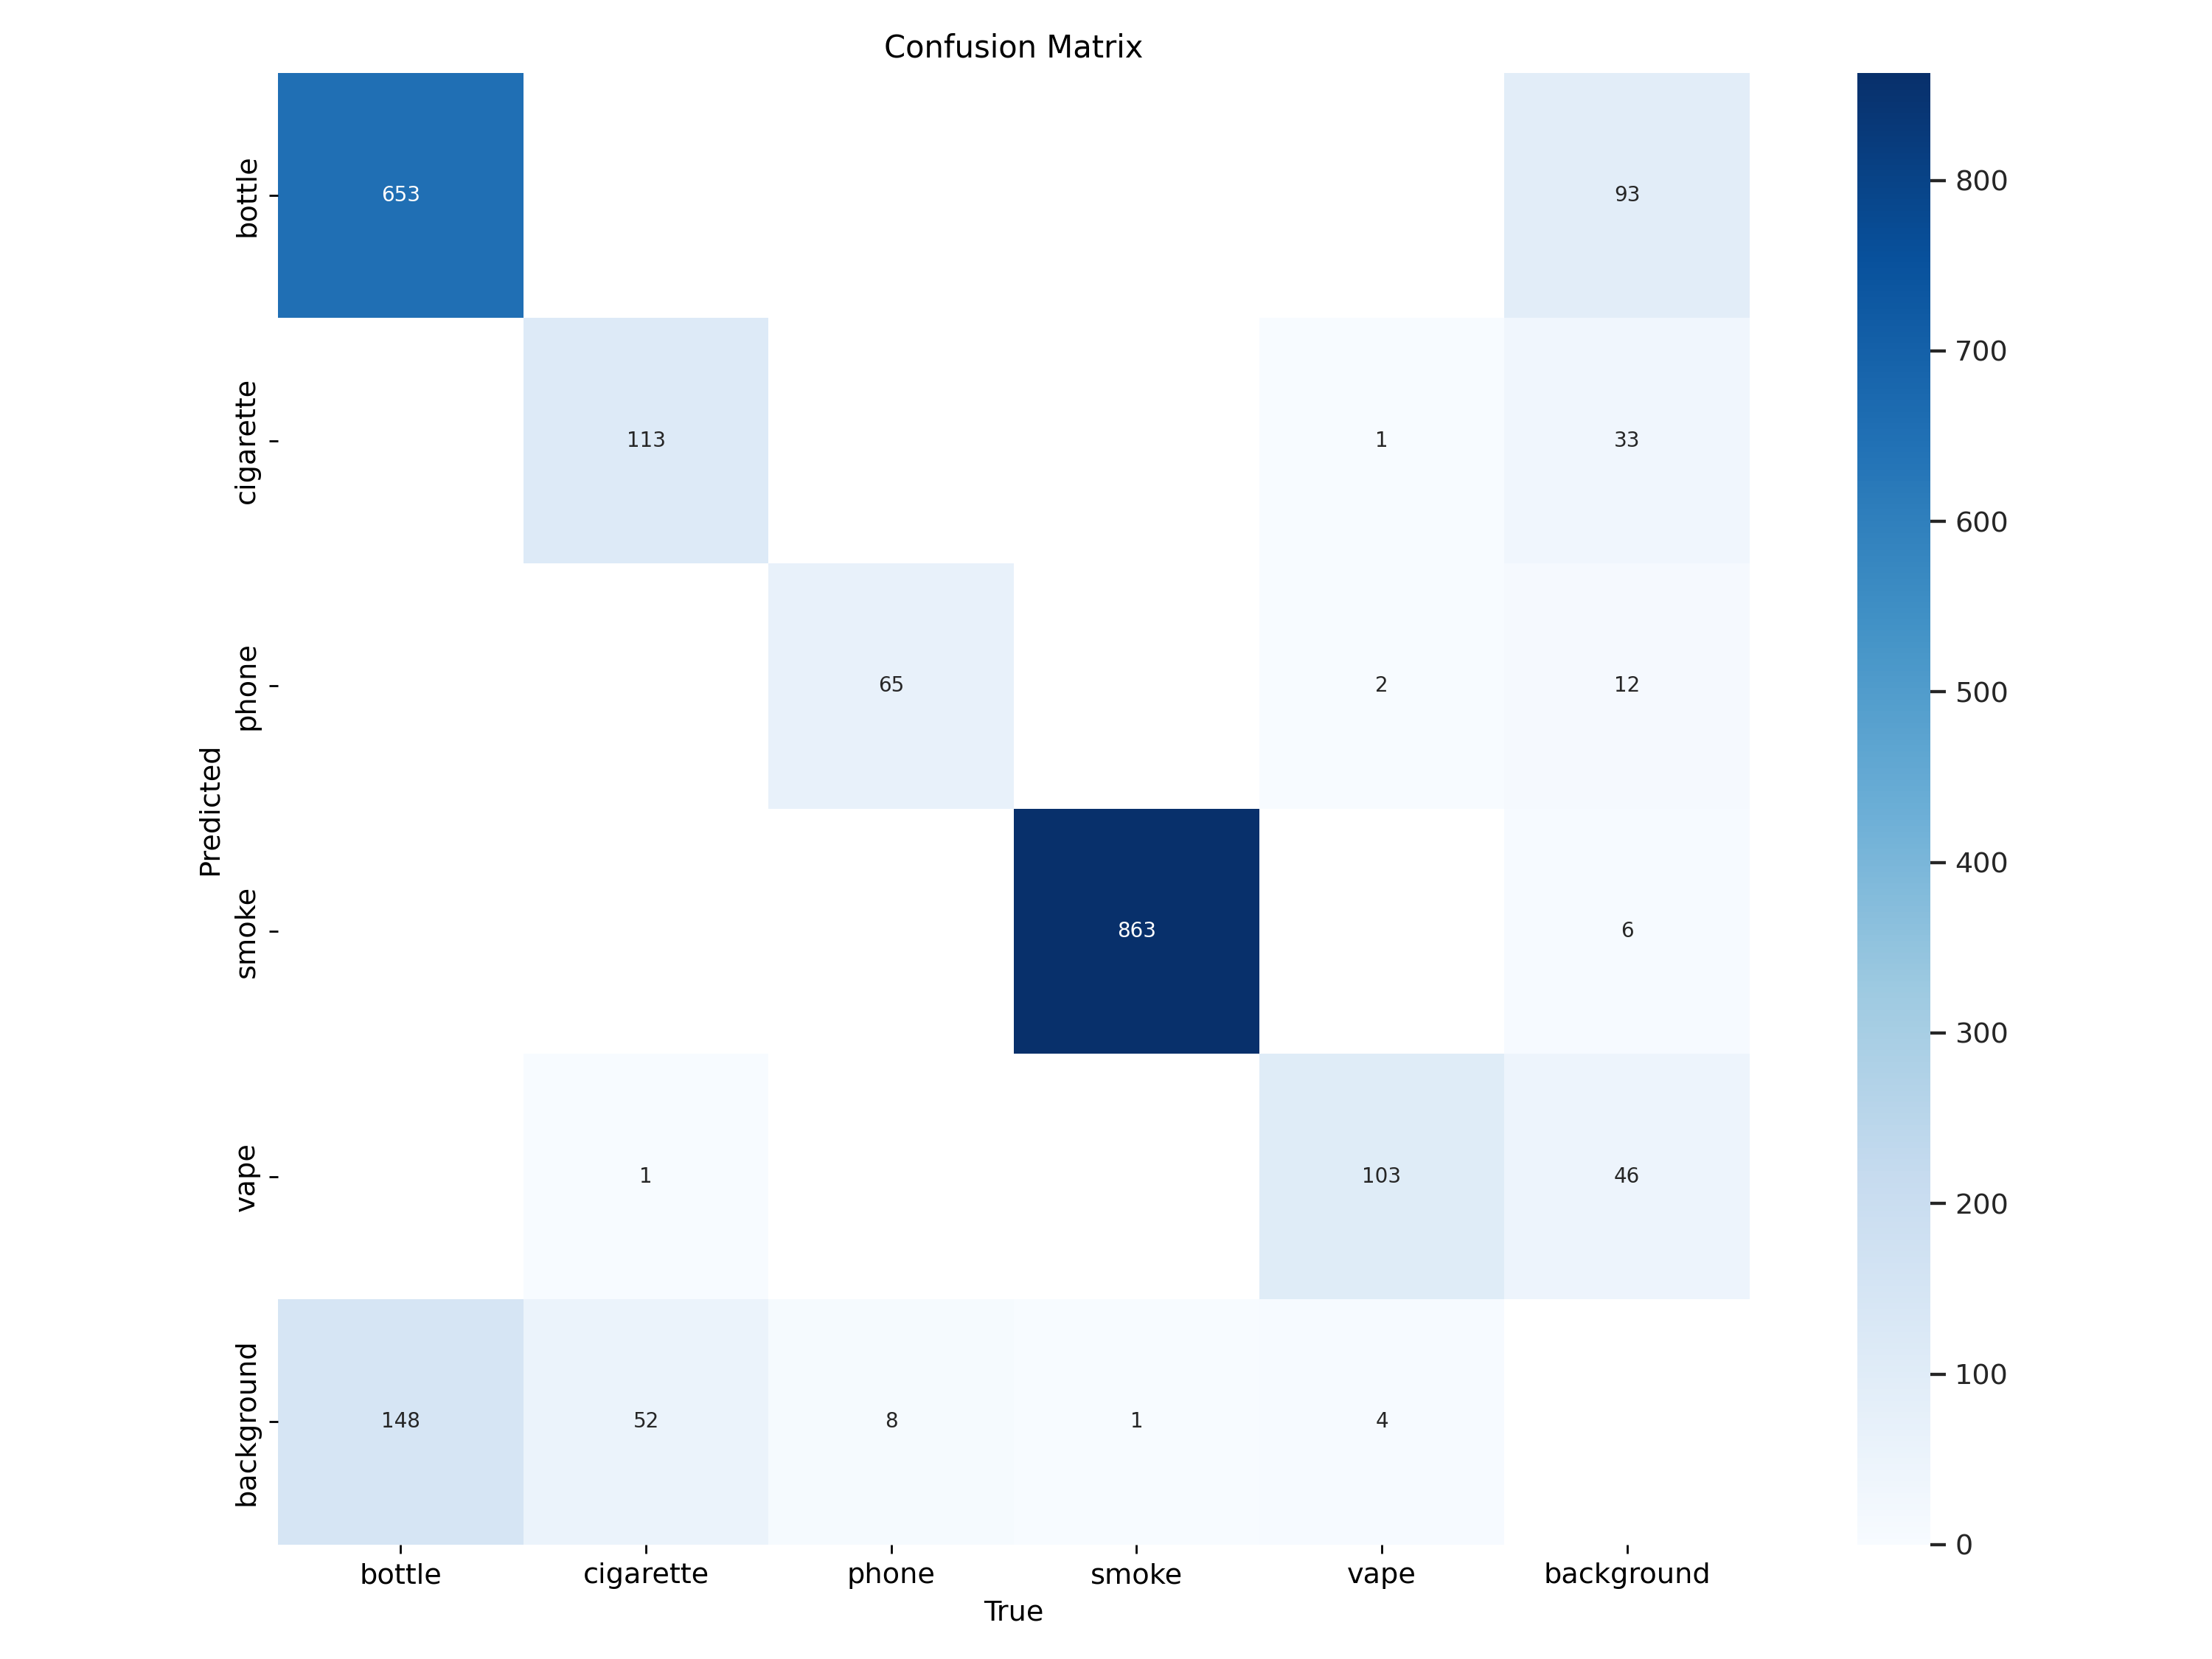

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


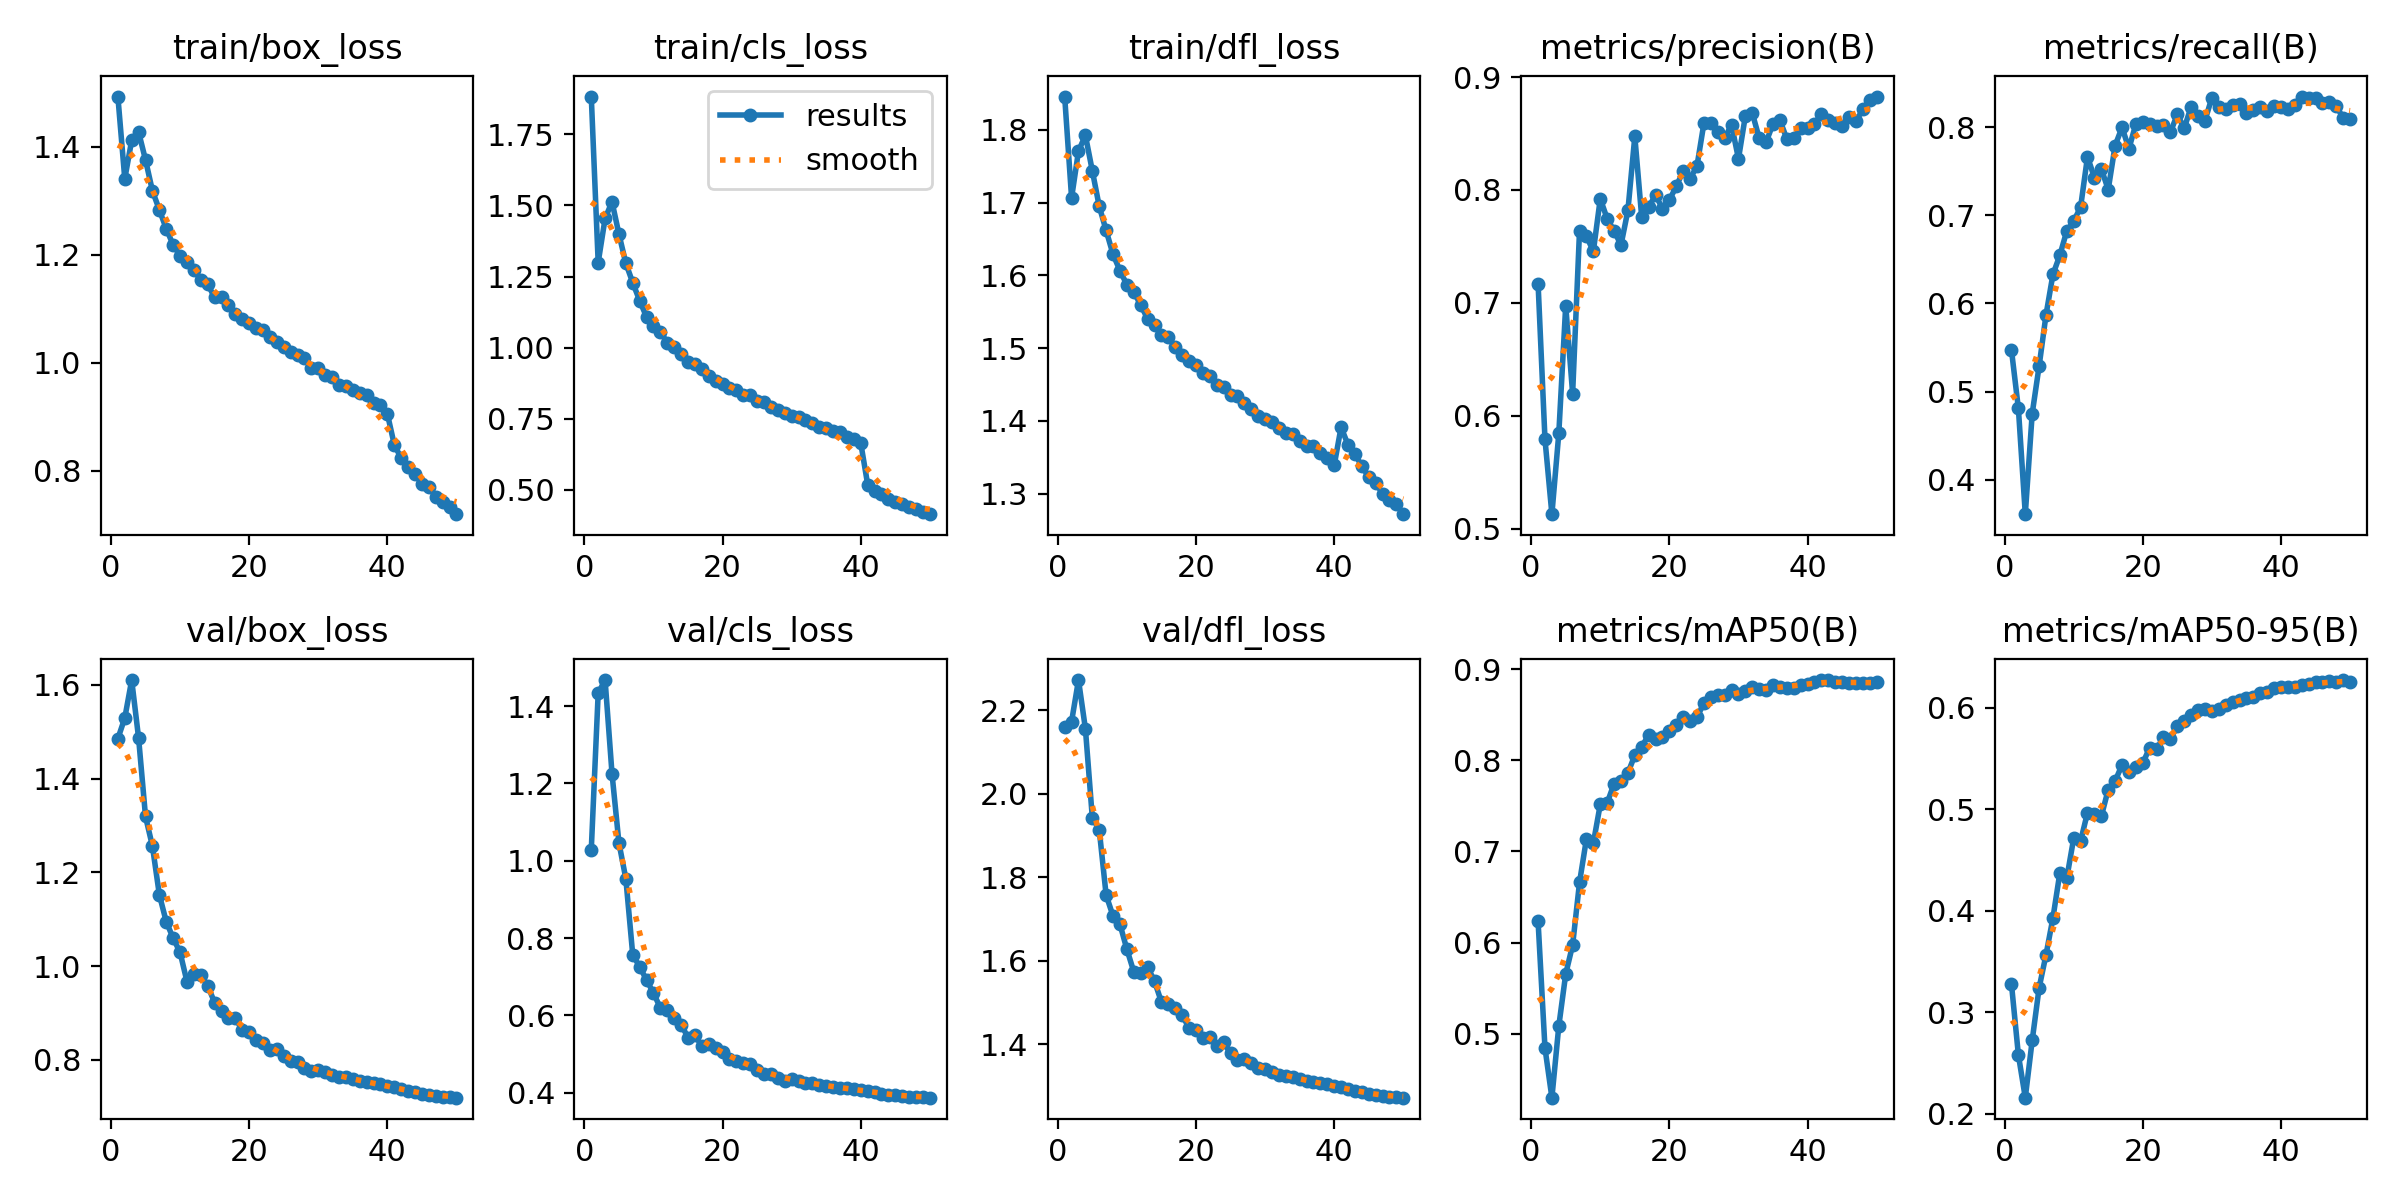

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

# Validate with Custom Data

In [10]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/working/datasets/driving-monitoring-system-2/valid/labels.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 372, len(boxes) = 2014. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1392       2014       0.88       0.81      0.885      0.627
                bottle       1392        801      0.928      0.736      0.896      0.654
             cigarette       1392        166      0.873      0.537      0.705      0.378
                 phone       1392         73      0.828      0.863      0.926        0.6
                 smoke       1

# Inference with Custom Data

In [11]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/525 /kaggle/working/datasets/driving-monitoring-system-2/test/images/-105_jpg.rf.36fd0450f7f3d4b7abc807b6056cf1ff.jpg: 800x800 1 vape, 23.3ms
image 2/525 /kaggle/working/datasets/driving-monitoring-system-2/test/images/-109_jpg.rf.64c544ad0ab0325ddfad27bca488b386.jpg: 800x800 1 bottle, 22.6ms
image 3/525 /kaggle/working/datasets/driving-monitoring-system-2/test/images/-1114_png_jpg.rf.65fa613857c6dd3e76a27603447bb108.jpg: 800x800 1 phone, 22.5ms
image 4/525 /kaggle/working/datasets/driving-monitoring-system-2/test/images/-11_jpg.rf.b0c843e9a587d77b7085ed576d2c900c.jpg: 800x800 3 bottles, 22.5ms
image 5/525 /kaggle/working/datasets/driving-monitoring-system-2/test/images/-160_jpg.rf.d70d00b24683855f932f0e1ca6e073a0.jpg: 800x800 3 bottles, 22.5ms
image 6/525 /ka

In [12]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='https://github.com/Braincore-C24-MS02/ML-Development/blob/main/dataset/video/driver_face_dataset.mp4'

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

⚠️ Download failure, retrying 1/3 https://github.com/Braincore-C24-MS02/ML-Development/blob/main/dataset/video/driver_face_dataset.mp4...

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x577cb3e4c780] moov atom not found
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict
